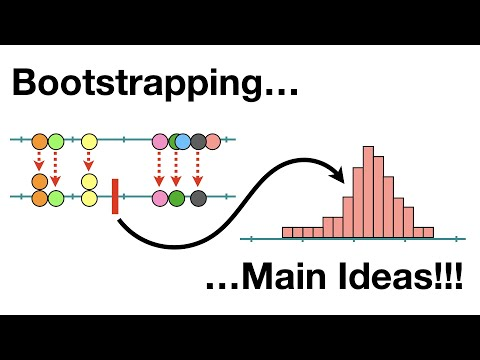

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation refers to how spread out your data is. On the other hand, the standard error of the mean measures how much the average is expected to vary if we repeatedly took samples from the population.

2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

A confidence interval gives you the range that is likely to contain the true population mean. Therefore, a 95% confidence interval means that if you took many samples and calculated a confidence interval for each one, 95% of those intervals would contain the true mean. In order to create this interval, one must multiply the standard error of the mean by 1.96 which is the critical value that corresponds with 95%. Then, you add and subtract this value to/from your sample mean, resulting in 95% confidence that the true population mean lies within this range.

3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

The first step is resampling from your original data set multiple times, each time creating a sample of the same size as the original data set. Then caluclate the samle means. Then, sort the sample means in order. Next, Use np.quantile(...) to find the 2.5th and 97.5th percentiles of this distribution, which ensures that 95% of the bootstrapped means fall within this range.

4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

np.mean and np.median are swapable in order to calculate confidence intervals for different statistics

In [6]:
import numpy as np

# Create a sample dataset (we'll make this up for the purpose of demonstration)
sample = np.array([12, 7, 19, 3, 15, 8, 11, 9])

# Define a function to compute the 95% bootstrap confidence interval for a given statistic (e.g., mean or median)
def bootstrap_confidence_interval(data, num_bootstrap_samples, statistic_func):
    bootstrap_statistics = []
    
    # Generate bootstrapped samples and compute the statistic for each
    for _ in range(num_bootstrap_samples):
        # Resample with replacement to create a bootstrapped sample
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        # Compute the statistic (e.g., mean or median) for the bootstrapped sample
        stat = statistic_func(boot_sample)
        # Store the result
        bootstrap_statistics.append(stat)
    
    # Compute the 95% confidence interval using the 2.5th and 97.5th percentiles
    lower_bound = np.quantile(bootstrap_statistics, 0.025)
    upper_bound = np.quantile(bootstrap_statistics, 0.975)
    
    return lower_bound, upper_bound

# Use the function to get a 95% bootstrap confidence interval for the mean
ci_mean = bootstrap_confidence_interval(sample, 1000, np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# Change the statistic function to get the confidence interval for the median
ci_median = bootstrap_confidence_interval(sample, 1000, np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")

95% Bootstrap Confidence Interval for the Mean: (7.496875, 13.875)
95% Bootstrap Confidence Interval for the Median: (7.0, 15.0)


ChatBot Link: https://chatgpt.com/share/66fa1a5e-d62c-8004-8230-89734f1df1e8

5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

It is important that we must disguish between the role of the population peramter and the sample statistic because they are two different things. The population perameter is unknown because we cannot actually measure a whole population. Instead, sample statistic is used to estimate the population perameter, giving us a range or estimate of where the true population perameter lies. When it comes to confidence intervals, they utilize the sample statistics to give us a confidence interval for the population as a whole.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1.) What is the process of bootstrapping?

Boostrapping is a technique that consists of have a sample of data that is used to represent a greater population. By obtaining an accurate representation, the sample of data is resampled the same amount of times as the original sample and can have the values replacing others, so the results are more sincere. This process is then repeating over and over, usually thousands of times creating variation in between each sample. You can then calculate the statistic of interest with all those samples such as mean or median. 

2.) What is the main purpose of bootstrapping?

The main purpose is being able to accurately represent a population with a smaller sample. 

3.) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

You can resample n times with replacement. You then repeat this thousands of times to get the average from each resample. You can then find the average of the average samples to hypothesize the average population and compare it to your original guess.  

7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

The confidence interval overlapping zero fails to reject the null hypothesis because it tells us how confident we are for estimating the range of the sample mean compared to the population. If it overlaps zero, that means there a chance that the the drug has no effect on the population. Some samples could have had a negative effect or positive effect, making the sample mean more in the middle, so although the sample mean statistic itself was not zero, the results ended up being around that range. 
Something that would lead to the opposite conclusion would be more drastic results. If the data was more left skewed or right skewed, the confidence interval would no longer fall around zero. This would then suggest, the drug has an effect on the person, resulting in a rejection of the null hypothesis. 

ChatBot Link: https://chatgpt.com/share/66ff3910-8f30-8004-9a3f-083f4bd56a25

In [2]:
import pandas as pd
url="https://raw.githubusercontent.com/adellicolli28/vaccine/refs/heads/main/vaccine"

df = pd.read_csv(url)
print(df.head())

    PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0           1   45      M                  84                86
1           2   34      F                  78                86
2           3   29      M                  83                80
3           4   52      F                  81                86
4           5   37      M                  81                84


AliTech has developed a vaccine with the intention of improving the health of those who take it. For this case, the null hypothesis would be the vaccine having no effect on the patients. Additionally, the alternative hypothesis would be the vaccine having an effect. 

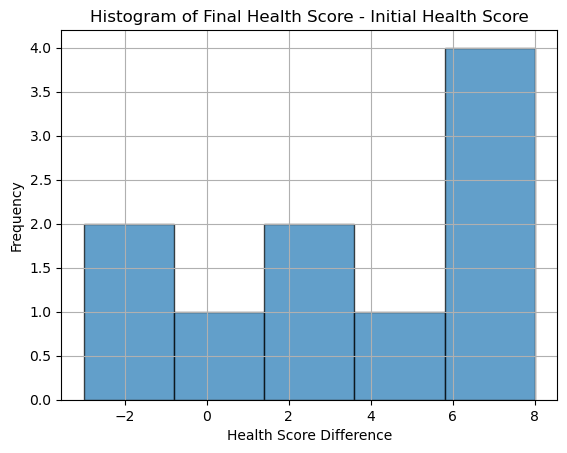

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between FinalHealthScore and InitialHealthScore
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot the histogram
plt.hist(df['HealthScoreDifference'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Histogram of Final Health Score - Initial Health Score')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

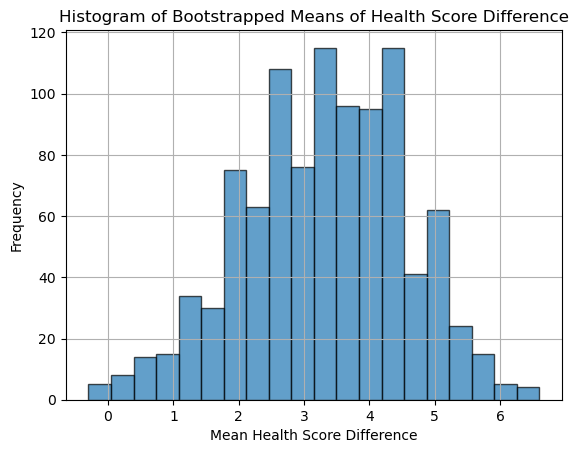

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between FinalHealthScore and InitialHealthScore
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set the random seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap = 1000

# Create an array to store the bootstrapped sample means
bootstrap_means = []

# Bootstrapping procedure
for _ in range(n_bootstrap):
    # Resample the health score differences with replacement
    bootstrap_sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    # Calculate the mean of the bootstrapped sample
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to a numpy array for analysis
bootstrap_means = np.array(bootstrap_means)

# Plot the histogram of one bootstrapped sample
plt.hist(bootstrap_means, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrapped Means of Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
import numpy as np
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the difference between FinalHealthScore and InitialHealthScore
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set a random seed for reproducibility
np.random.seed(42)

# Define a function to perform bootstrapping
def bootstrap(data, n_iterations):
    bootstrapped_means = []
    n = len(data)
    for _ in range(n_iterations):
        # Generate a bootstrap sample
        sample = np.random.choice(data, size=n, replace=True)
        # Calculate the mean of the bootstrap sample
        bootstrapped_means.append(np.mean(sample))
    return bootstrapped_means

# Perform bootstrapping with 1000 iterations
n_iterations = 1000
bootstrapped_differences = bootstrap(df['HealthScoreDifference'], n_iterations)

# Calculate the 95% confidence interval
lower_bound = np.quantile(bootstrapped_differences, 0.025)
upper_bound = np.quantile(bootstrapped_differences, 0.975)

# Display the confidence interval
print(f"95% Confidence Interval for the mean difference: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Confidence Interval for the mean difference: [0.70, 5.50]


ChatBot Link: https://chatgpt.com/share/66ff4097-ed24-8004-8075-cf2da8724b0d

As ilustrated in the histogram above after bootstrapping, it is clear that the majority of the health scores increased around 3-4 after the vaccine. Additionally, the 95% confidence interval for the mea difference was between 0.7 and 5.5 suggesting that the vaccine did have a health effect and a positive one. This would mean that the null hypothesis would be rejected. It is also possible that age or sex would have an impact on the results.